In [ ]:
# Essential libraries

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [ ]:
%cd ..
from google.colab import drive
drive.mount('./content/gdrive')

/
Mounted at ./content/gdrive


In [ ]:
DATADIR = "/content/gdrive/MyDrive/Gait_analysis/all_fixed/data_150"

In [ ]:
CATEGORIES = ["normal_resized150", "abnormal_resized150"]

In [ ]:
# To make the training data and labels from the datadir and categories
IMG_SIZE = 64
training_data = []
labels = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            #try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append(new_array)
            
            if "abnormal_resized150" in category:
                labels.append(0)
            else:
                labels.append(1)
           # except Exception as e:
            #    pass

create_training_data()

In [ ]:
# Reshaping the images as 1D array because the model takes images
# as 1D array. Also made the labels a numpy array.

X = np.array(training_data).reshape(len(training_data), 4096).astype(float)
y = np.array(labels)

In [ ]:
len(training_data)

276

In [ ]:
X.shape

(276, 4096)

In [ ]:
y.shape

(276,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 43)

In [ ]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

193
193
83
83


RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20, random_state = 3)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=3)

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
model.score(X_test,y_test)

0.963855421686747

AFTER HYPERPARAMETER TUNING

In [ ]:
model_C = RandomForestClassifier(n_estimators = 80, criterion="entropy")
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9642857142857143

USING PIPELINE METHOD FOR HYPERPARAMETERS TUNING

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

model1 = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators= 80))
model1.fit(X_train, y_train)
model1.score(X_test,y_test)
#Pipeline(steps=[('standardscaler', StandardScaler()),
 #               ('svc', SVC(gamma='auto'))])

0.9107142857142857

In [ ]:
y_predicted1 = model1.predict(X_test)

The true label says it is a normal gait
The model predicted it to be a normal gait


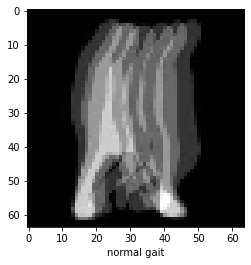

In [ ]:
# predict with the trained model 
n = 32
labels = ["abnormal gait","normal gait"]
sample_image = X_test[n]
sample_label = y_test[n]
predicted_label = y_predicted[n]
model.predict([sample_image])
print("The true label says it is a", labels[predicted_label])
print("The model predicted it to be a", labels[sample_label])


# To see the predicted image, we need to change the 1D array to 2D array

example = np.reshape(sample_image, (64, 64))
plt.imshow(example, cmap = "gray")
plt.xlabel(labels[sample_label])
plt.show()

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        36
           1       0.96      0.98      0.97        47

    accuracy                           0.96        83
   macro avg       0.96      0.96      0.96        83
weighted avg       0.96      0.96      0.96        83



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[34,  2],
       [ 1, 46]])

Text(15.0, 0.5, 'Truth')

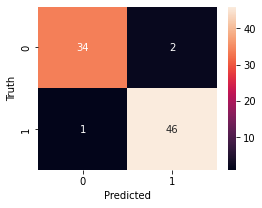

In [ ]:
# Let's view a more asthetic confusion matrix

import seaborn as sn
plt.figure(figsize = (4, 3))
sn.heatmap(cm, annot= True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=80),X_train, y_train, cv=5)


In [ ]:
scores

array([0.94871795, 1.        , 0.92307692, 0.94736842, 0.89473684])

In [ ]:
np.average(scores)

0.9427800269905532

In [ ]:
np.max(scores)

1.0

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_true, y_pred, pos_label=0)

0.9444444444444444

In [ ]:
sensitivity = sklearn.metrics.recall_score(y_true , y_pred)
sensitivity

1.0

In [ ]:
specificity = sklearn.metrics.recall_score(np.logical_not(y_true) , np.logical_not(y_pred))
specificity

0.9444444444444444

In [ ]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)

In [ ]:
print(specificity)
print(sensitivity)
print(precision)
print(recall)

0.9444444444444444
1.0
0.9428571428571428
1.0
